# pyGMs Introduction: Message Passing Approximations

In [1]:
import numpy as np
import pyGMs as gm
import matplotlib.pyplot as plt

... Message passing ...

### <span style="color:red"> TODO: Convert implementations to stateful objects </span>

### Example Model

Let us first build a simple graphical model on which to perform our inference tasks:

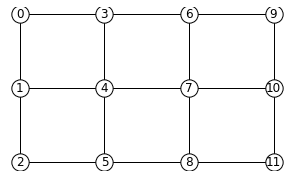

In [2]:
h,w = 3,4
X = [gm.Var(i,3) for i in range(h*w)]
tab = np.array([[1,0,0],[0,.9,0],[0,0,.8]])+.1
factors  = [gm.Factor([X[h*i+j],X[h*i+j+1]],tab) for i in range(w) for j in range(h-1)]
factors += [gm.Factor([X[h*i+j],X[h*i+j+h]],tab) for i in range(w-1) for j in range(h)]

pos = {i:(i//h,-(i%h)) for i in range(h*w)}

model = gm.GraphModel(factors)

order = list(range(w*h))            # default elimination order

fig,ax=plt.subplots(1,1,figsize=(5,3)); ax.set_axis_off();
gm.drawMarkovGraph(model,node_color='w',ax=ax, pos=pos);

### Loopy Belief Propagation

A basic, non-stateful implementation of loopy BP:

In [3]:
import pyGMs.messagepass

lnZ, beliefs = gm.messagepass.LBP( model, maxIter=10, verbose=True)

Iter 1: -1.8957191735934185
Iter 2: -0.08707753656940032
Iter 3: 2.40959928756516
Iter 4: 4.246056405002893
Iter 5: 4.178004403168848
Iter 6: 2.9267770567983273
Iter 7: 2.1059081066450434
Iter 8: 1.8220040658828698
Iter 9: 1.7399604089396985
Iter 10: 1.7182854922042377


### Naive Mean Field

A basic, non-stateful implementation of basic mean field:

In [4]:
lnZ, beliefs = gm.messagepass.NMF( model, maxIter=10, verbose=True)

Iter 0: -12.931600890971822
Iter 1: -11.479220478575103
Iter 2: -2.96463384653648
Iter 3: 1.3325116383080733
Iter 4: 1.6958547393195542
Iter 5: 1.6958754885902954
Iter 6: 1.6958754886345808
Iter 7: 1.6958754886345815
Iter 8: 1.6958754886345813
Iter 9: 1.6958754886345815
Iter 10: 1.6958754886345815


### Dual Decomposition

A reparameterization based fixed point update for dual decomposition for MAP:

In [5]:
lnF, lnR, rhat = gm.messagepass.DualDecomposition( model, maxIter=10, verbose=True)
print(f'{lnF} > ln f* > {lnR} = f({rhat})')

Iter 0: 1.6202730566735244
Iter 1: 1.6202730566735244 > [1.62027306]
Iter 2: 1.6202730566735244 > [1.62027306]
Iter 3: 1.6202730566735244 > [1.62027306]
Iter 4: 1.6202730566735244 > [1.62027306]
Iter 5: 1.6202730566735244 > [1.62027306]
Iter 6: 1.6202730566735244 > [1.62027306]
Iter 7: 1.6202730566735244 > [1.62027306]
Iter 8: 1.6202730566735244 > [1.62027306]
Iter 9: 1.6202730566735244 > [1.62027306]
Iter 10: 1.6202730566735244 > [1.62027306]
1.6202730566735244 > ln f* > [1.62027306] = f([0 0 0 0 0 0 0 0 0 0 0 0])


### Weighted Dual Decomposition

A reparameterization based fixed point update for decomposition bounds on the partition function.  This is still experimental.

In [10]:
# Initialize weights to equal among each factor that includes that variable...
weights = [ [1./len(model.factorsWith(v)) for v in f.vars] for f in factors ]
#print(weights)

# Now, perform updates to tighten the bound...
lnZw, thetas  = gm.messagepass.WeightedDD(factors, weights=weights, elimOrder=order, maxIter=10, verbose=True)
print(f'{lnZw} > ln Z')

# thetas are re-parameterized log factors of the original model

Iter 0: 6.7485839361041835
[0.26203250885009766] Iter 1 : 6.119944093296255
[0.5278480052947998] Iter 2 : 5.601788479798689
[0.7878053188323975] Iter 3 : 5.16210678246847
[1.0542335510253906] Iter 4 : 4.823448029518986
[1.323129653930664] Iter 5 : 4.555956052089486
[1.5901942253112793] Iter 6 : 4.362861197826344
[1.8976049423217773] Iter 7 : 4.17385672235478
[2.187412738800049] Iter 8 : 4.017074643876998
[2.4546732902526855] Iter 9 : 3.8774144908021864
[2.77581787109375] Iter 10 : 3.750470124599726
3.750470124599726 > ln Z
